In [73]:
# For data manipulation
import pandas as pd
import numpy as np

# For text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# For feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# For model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# For visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

**Data Pre-Processing**


In [74]:
# Loading dataSet to pandas DF
news_dataSet = pd.read_csv('dataset.csv')

In [75]:
news_dataSet.shape

(20800, 5)

In [76]:
news_dataSet.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [77]:
# Checking missing value
news_dataSet.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [78]:
# Dropping missing values
news_dataSet = news_dataSet.dropna()

In [79]:
news_dataSet.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [80]:
len(news_dataSet)

18285

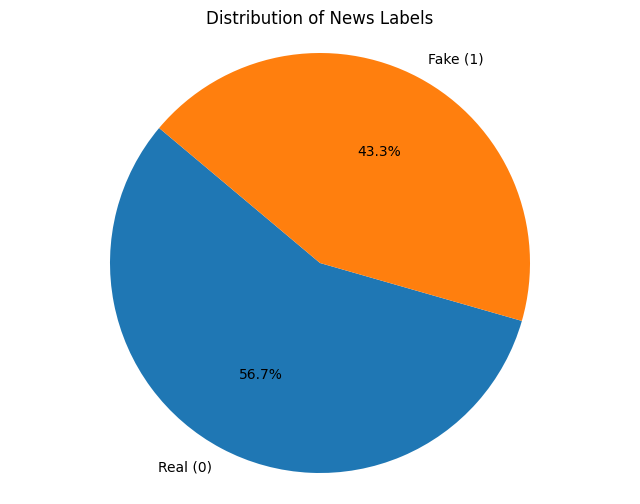

In [12]:
# Checking distribution of labels
label_counts = news_dataSet['label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Real (0)', 'Fake (1)'],
        autopct='%1.1f%%', startangle=140)
plt.title('Distribution of News Labels')
plt.axis('equal')
plt.show()

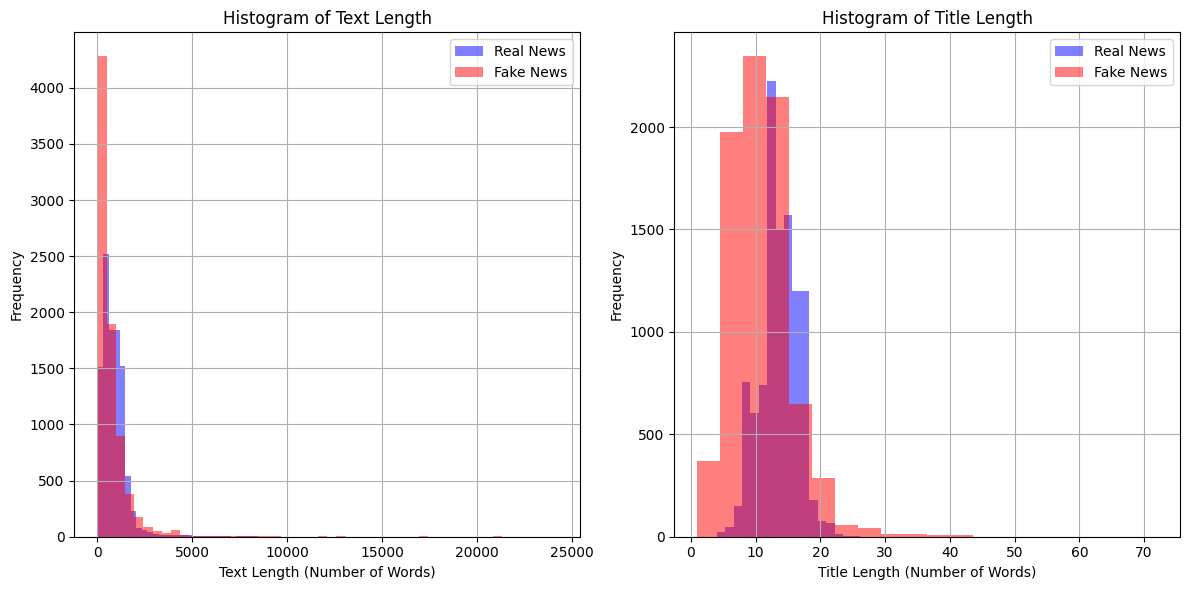

In [13]:

# Visualizing the text data

real_text_lengths = news_dataSet[news_dataSet['label'] == 0]['text'].apply(
    lambda x: len(x.split()))
fake_text_lengths = news_dataSet[news_dataSet['label'] == 1]['text'].apply(
    lambda x: len(x.split()))


real_title_lengths = news_dataSet[news_dataSet['label'] == 0]['title'].apply(
    lambda x: len(x.split()))
fake_title_lengths = news_dataSet[news_dataSet['label'] == 1]['title'].apply(
    lambda x: len(x.split()))

# Plot histograms for text length
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(real_text_lengths, bins=50, color='blue',
         alpha=0.5, label='Real News')
plt.hist(fake_text_lengths, bins=50, color='red', alpha=0.5, label='Fake News')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.legend()
plt.grid(True)

# Plot histograms for title length
plt.subplot(1, 2, 2)
plt.hist(real_title_lengths, bins=20, color='blue',
         alpha=0.5, label='Real News')
plt.hist(fake_title_lengths, bins=20, color='red',
         alpha=0.5, label='Fake News')
plt.xlabel('Title Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Histogram of Title Length')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

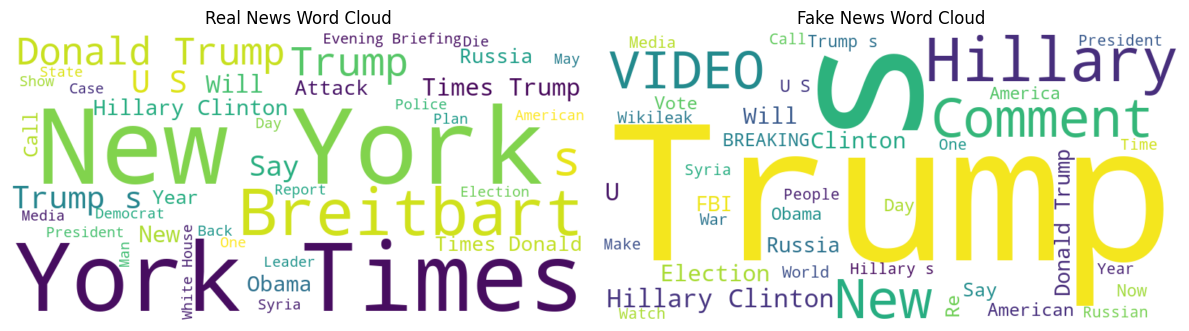

In [64]:
# Word cloud for real and fake news titles
real_text = ' '.join(news_dataSet[news_dataSet['label'] == 0]['title'])
fake_text = ' '.join(news_dataSet[news_dataSet['label'] == 1]['title'])

# Generate word clouds
real_wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_words=40).generate(real_text)
fake_wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_words=40).generate(fake_text)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Word cloud for real and fake news text
real_text = ' '.join(news_dataSet[news_dataSet['label'] == 0]['text'])
fake_text = ' '.join(news_dataSet[news_dataSet['label'] == 1]['text'])

# Generate word clouds
real_wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_words=40).generate(real_text)
fake_wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_words=40).generate(fake_text)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

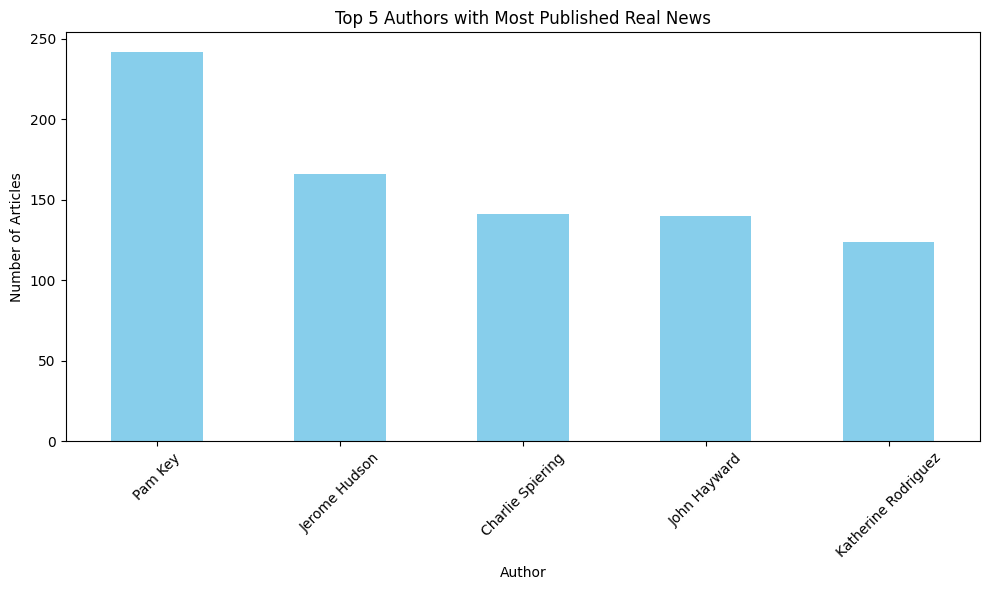

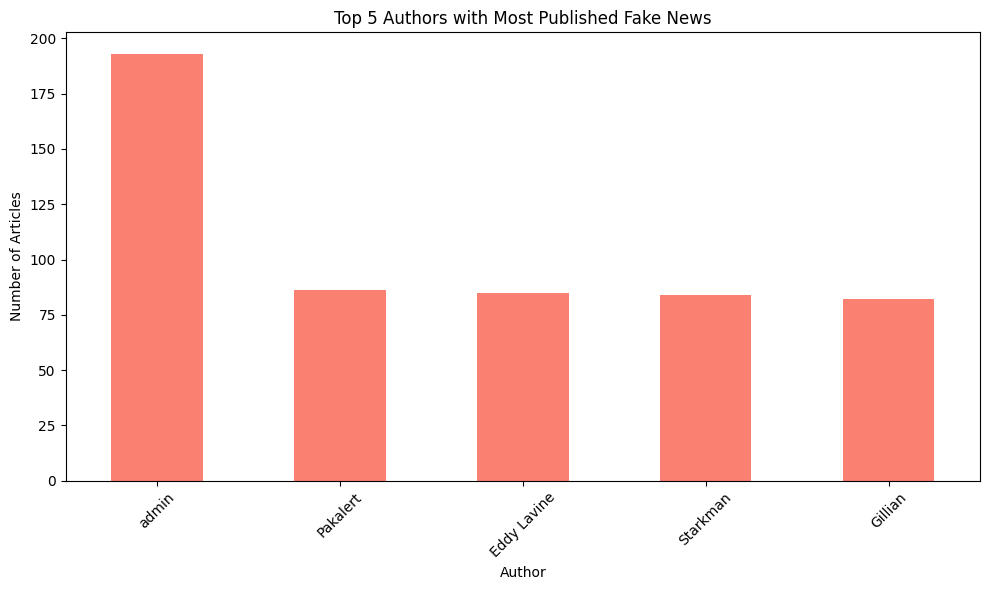

In [16]:

# Top 5 authors with most published articles for real and fake news

real_news_data = news_dataSet[news_dataSet['label'] == 0]
fake_news_data = news_dataSet[news_dataSet['label'] == 1]


real_author_counts = real_news_data['author'].value_counts().head(5)
fake_author_counts = fake_news_data['author'].value_counts().head(5)

# Plot top 5 authors for real news
plt.figure(figsize=(10, 6))
real_author_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Authors with Most Published Real News')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top 5 authors for fake news
plt.figure(figsize=(10, 6))
fake_author_counts.plot(kind='bar', color='salmon')
plt.title('Top 5 Authors with Most Published Fake News')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
# merging the author name and news title
news_dataSet['content'] = news_dataSet['author']+" " + \
    news_dataSet['title'] + " "+news_dataSet['text']
news_dataSet['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799    David Swanson What Keeps the F-35 Alive   Davi...
Name: content, Length: 18285, dtype: object

**Stemming Process**


In [82]:
port_stem = PorterStemmer()

In [83]:

# Function to apply stemming to a single content

def stemming_batch(contents):
    # Initialize Porter Stemmer and stopwords
    port_stem = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    stemmed_contents = []
    for content in contents:
        # filtering out numbers, symbols only keeping alphabets
        stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
        stemmed_content = stemmed_content.lower()
        stemmed_content = stemmed_content.split()
        stemmed_content = [port_stem.stem(
            word) for word in stemmed_content if word not in stop_words]
        stemmed_content = ' '.join(stemmed_content)
        stemmed_contents.append(stemmed_content)

    return stemmed_contents


batch_size = 1000
num_batches = len(news_dataSet) // batch_size + \
    (1 if len(news_dataSet) % batch_size != 0 else 0)

print('Number of batches:', num_batches)

for i in range(num_batches):
    print('Processing batch:', i)
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, len(news_dataSet))
    batch_contents = news_dataSet['content'][start_index:end_index].tolist()

    # Apply stemming to the batch
    stemmed_batch = stemming_batch(batch_contents)

    # Update the DataFrame with the stemmed batch
    news_dataSet.iloc[start_index:end_index,
                      news_dataSet.columns.get_loc('content')] = stemmed_batch
    print('Batch processed:', i)

Number of batches: 19
Processing batch: 0
Batch processed: 0
Processing batch: 1
Batch processed: 1
Processing batch: 2
Batch processed: 2
Processing batch: 3
Batch processed: 3
Processing batch: 4
Batch processed: 4
Processing batch: 5
Batch processed: 5
Processing batch: 6
Batch processed: 6
Processing batch: 7
Batch processed: 7
Processing batch: 8
Batch processed: 8
Processing batch: 9
Batch processed: 9
Processing batch: 10
Batch processed: 10
Processing batch: 11
Batch processed: 11
Processing batch: 12
Batch processed: 12
Processing batch: 13
Batch processed: 13
Processing batch: 14
Batch processed: 14
Processing batch: 15
Batch processed: 15
Processing batch: 16
Batch processed: 16
Processing batch: 17
Batch processed: 17
Processing batch: 18
Batch processed: 18


In [84]:
news_dataSet['content'].head(2)

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
Name: content, dtype: object

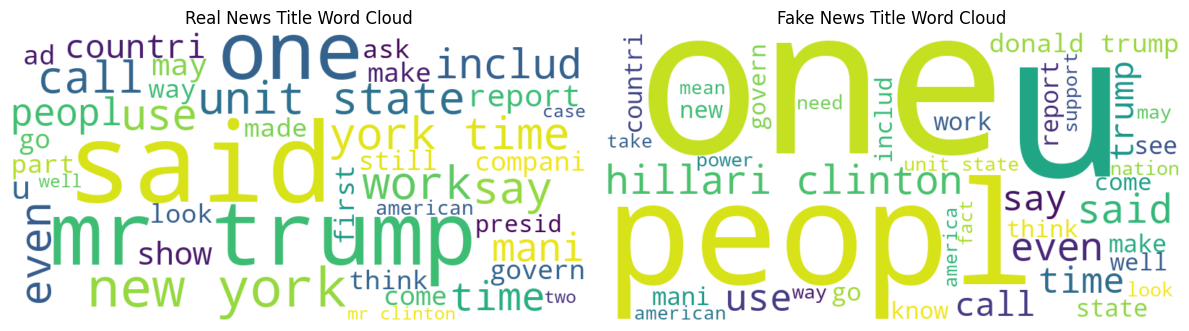

In [66]:
# Word cloud for real and fake news Merged content (author + title + text)

real_titles = ' '.join(news_dataSet[news_dataSet['label'] == 0]['content'])
fake_titles = ' '.join(news_dataSet[news_dataSet['label'] == 1]['content'])

# Generate word clouds for titles
real_title_wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_words=40).generate(real_titles)
fake_title_wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_words=40).generate(fake_titles)

# Plot word clouds for titles
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(real_title_wordcloud, interpolation='bilinear')
plt.title('Real News Title Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_title_wordcloud, interpolation='bilinear')
plt.title('Fake News Title Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [86]:
# Seprating the data and label
X = news_dataSet['content'].values
Y = news_dataSet['label'].values

In [87]:
# Converting the textual data to numberical data
# Assign numberical value to repeating significant words

vectorizer = TfidfVectorizer()

vectorizer.fit(X)

X = vectorizer.transform(X)

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Vectorized X: \n")
print(X)

Vectorized X: 

  (0, 103542)	0.04901434835330664
  (0, 103495)	0.01872577569795248
  (0, 102585)	0.04408585624372993
  (0, 102581)	0.09471806550886494
  (0, 102538)	0.0373955616362059
  (0, 102503)	0.011120618587639634
  (0, 101885)	0.017068661622212464
  (0, 101113)	0.016943168142829257
  (0, 101024)	0.012438945053558758
  (0, 100943)	0.02963752596590382
  (0, 100871)	0.012612127305072907
  (0, 100686)	0.011580772427573811
  (0, 99894)	0.02551891793554028
  (0, 99860)	0.0313803091232797
  (0, 98937)	0.021537726515811532
  (0, 97643)	0.06519465259133668
  (0, 96993)	0.033236200929305154
  (0, 96749)	0.01614637638746375
  (0, 96000)	0.037998720496489065
  (0, 95396)	0.01087634980891986
  (0, 95387)	0.04207735317609801
  (0, 95335)	0.13573175453703548
  (0, 95196)	0.07038333993030485
  (0, 93994)	0.03945123665577682
  (0, 93460)	0.026904266051021565
  :	:
  (18284, 7004)	0.010430773388291797
  (18284, 6696)	0.027700547220170835
  (18284, 6418)	0.03865017378349558
  (18284, 6380)	0.02527

**Splitting the dataset to training & test data**


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2)

In [31]:
print("Train data shape: ", Y_train.shape)
print("Test data shape: ",  Y_test.shape)

Train data shape:  (14628,)
Test data shape:  (3657,)


**Model Training and Evaluation with Multiple Algorithms**

_Naive Bayes, Support Vector Machines, Random Forest, Logistic Regression_


Training Naive Bayes model...
Naive Bayes model trained.

Evaluating Naive Bayes model...
Naive Bayes: Training Data Accuracy = 0.8218485097074104
Naive Bayes: Testing Data Accuracy = 0.7954607601859448
model trained and evaluated

Training Support Vector Machines model...
Support Vector Machines model trained.

Evaluating Support Vector Machines model...
Support Vector Machines: Training Data Accuracy = 0.9989062072737216
Support Vector Machines: Testing Data Accuracy = 0.9723817336614712
model trained and evaluated

Training Random Forest model...
Random Forest model trained.

Evaluating Random Forest model...
Random Forest: Training Data Accuracy = 1.0
Random Forest: Testing Data Accuracy = 0.9382007109652721
model trained and evaluated

Training Logistic Regression model...
Logistic Regression model trained.

Evaluating Logistic Regression model...
Logistic Regression: Training Data Accuracy = 0.9796964725184577
Logistic Regression: Testing Data Accuracy = 0.963084495488105
model t

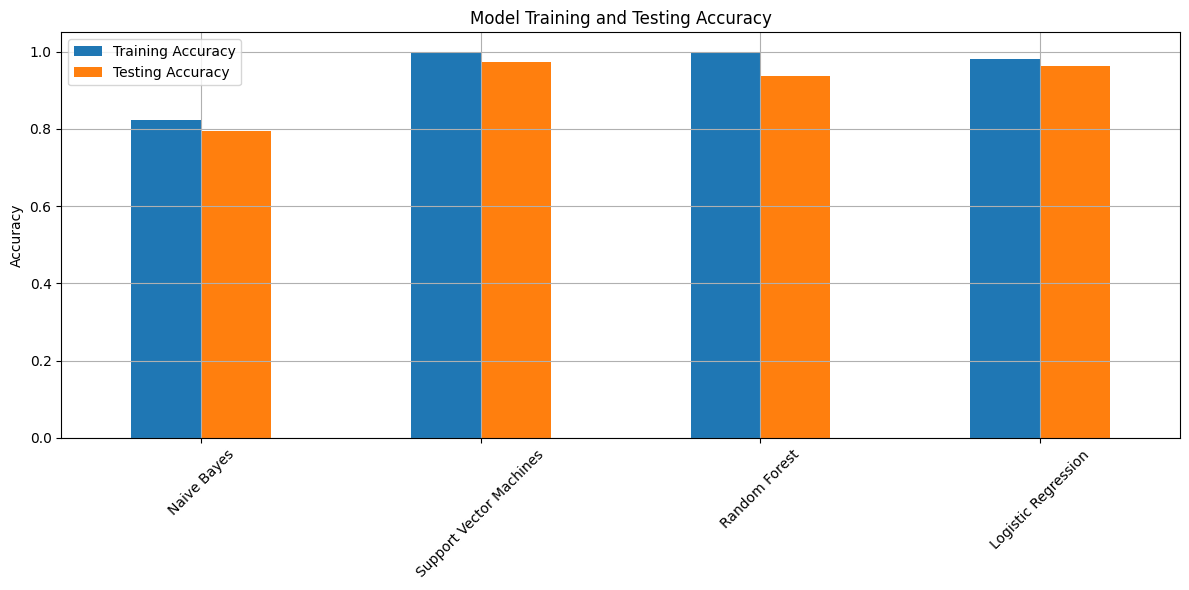

In [32]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machines": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each model
results = {}

for name, model in models.items():

    print(f"Training {name} model...")

    model.fit(X_train, Y_train)

    print(f"{name} model trained.\n")

    X_train_prediction = model.predict(X_train)

    X_test_prediction = model.predict(X_test)

    print(f"Evaluating {name} model...")

    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

    print(f"{name}: Training Data Accuracy = {training_data_accuracy}")
    print(f"{name}: Testing Data Accuracy = {test_data_accuracy}")

    # store the accuracy of the model for training and testing data
    results[name] = [training_data_accuracy, test_data_accuracy]

    print("model trained and evaluated\n")


# Plot the accuracy of each model
results_df = pd.DataFrame(
    results, index=['Training Accuracy', 'Testing Accuracy'])
results_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('Model Training and Testing Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
model = SVC()

In [43]:
model.fit(X_train, Y_train)

SVC()

**Evaluation**

_Accuracy Score_


In [45]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
training_data_accuracy  # accuracy for training set

0.9989062072737216

In [47]:
test_data_accuracy      # accuracy for test set

0.9723817336614712

**Making Predictive system**


In [48]:
X_new = X_test[12]
print(X_new)

  (0, 293)	0.03020678102459917
  (0, 898)	0.011545745901047231
  (0, 1201)	0.07322440089471953
  (0, 1568)	0.02791145089598141
  (0, 2832)	0.02417402864368886
  (0, 3146)	0.05045411906797129
  (0, 3460)	0.05208804292047206
  (0, 3538)	0.029015546167680397
  (0, 3547)	0.028677939157738818
  (0, 3590)	0.04138586114355669
  (0, 3927)	0.02242644408925056
  (0, 4291)	0.02326533798035993
  (0, 4517)	0.024645413068060274
  (0, 4583)	0.017001792862291035
  (0, 5299)	0.029971369456554077
  (0, 5470)	0.029936476702392065
  (0, 5624)	0.025983949610737033
  (0, 6381)	0.027622923176309974
  (0, 6642)	0.017566947656352444
  (0, 7004)	0.031139298240626518
  (0, 7173)	0.05000125124867313
  (0, 8420)	0.020504800190728076
  (0, 8425)	0.027405732235495434
  (0, 8623)	0.03781846721791823
  (0, 8939)	0.021830123149463934
  :	:
  (0, 94914)	0.0485206489948336
  (0, 95396)	0.05652427804065863
  (0, 96729)	0.021846635741495556
  (0, 97325)	0.028386790706254238
  (0, 97376)	0.11709922994836347
  (0, 98151)	0.0

In [49]:
X_new = X_test[12]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
    print("The News is Real")
else:
    print("The News is Fake")

[0]
The News is Real


In [50]:
print(Y_test[12])

0


In [67]:
%pip install joblib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [71]:
import joblib
joblib.dump(model, 'svc_model.pkl')

['svc_model.pkl']